# Data Exploration

## Install Dependencies

In [23]:
# %pip install 'SQLAlchemy==1.4.46' folium pandas matplotlib
# %pip install folium
# %pip install matplotlib
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 25.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 56.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 57.4 MB/s eta 0:00:00


## Cleansing the Data

In [8]:
import pandas as pd

# # Read the table into a Pandas dataframe
df = pd.read_sql_table('Location_Traffic_Accidents', 'sqlite:///my_database.db')

# Display the dataframe
df

,Day_of_the_Week,Categorie_of_the_accident,Longitude,Latitude
0,4,Accident_with_serious_injuries,13.455,52.462
1,3,Accident_with_serious_injuries,13.291,52.494
2,1,Accident_with_minor_injuries,13.305,52.484
3,6,Accident_with_serious_injuries,13.437,52.518
4,1,Accident_with_minor_injuries,13.300,52.488
...,...,...,...,...
11805,4,Accident_with_minor_injuries,13.378,52.466
11806,3,Accident_with_minor_injuries,13.311,52.613
11807,3,Accident_with_minor_injuries,13.420,52.506
11808,3,Accident_with_minor_injuries,13.392,52.511


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Analysis

# Most Frequent Latitude and Longitude
most_frequent_lat = df['Latitude'].value_counts().idxmax()

most_frequent_lon = df['Longitude'].value_counts().idxmax()

# Accident Count by Day of the Week
accident_count_by_day = df['Day_of_the_Week'].value_counts()

# Accident Count by Category
accident_count_by_category = df['Categorie_of_the_accident'].value_counts()

## Description of the dataset

In [10]:
import pandas as pd

# Data Analysis

# Most Frequent Location
most_frequent_location = df.groupby(['Latitude', 'Longitude']).size().idxmax()
most_frequent_count = df.groupby(['Latitude', 'Longitude']).size().max()

# Accident Count by Day of the Week
accident_count_by_day = df['Day_of_the_Week'].value_counts()

# Accident Count by Category
accident_count_by_category = df['Categorie_of_the_accident'].value_counts()

# Data Analysis Output

# Most Frequent Location and Count
print("Most Frequent Location (Latitude, Longitude): ", most_frequent_location)
print("Count of Accidents",most_frequent_location,":", most_frequent_count)
print()

# Accident Count by Day of the Week
print("Accident Count by Day of the Week:")
print(accident_count_by_day)
print()

# Accident Count by Category
print("Accident Count by Category:")
print(accident_count_by_category)
print()

Most Frequent Location (Latitude, Longitude):  (52.516, 13.454)
Count of Accidents (52.516, 13.454) : 19

Accident Count by Day of the Week:
Day_of_the_Week
4    2021
3    1968
5    1934
2    1906
6    1789
7    1261
1     931
Name: count, dtype: int64

Accident Count by Category:
Categorie_of_the_accident
Accident_with_minor_injuries      10023
Accident_with_serious_injuries     1742
Accident_with_Fatalities             45
Name: count, dtype: int64



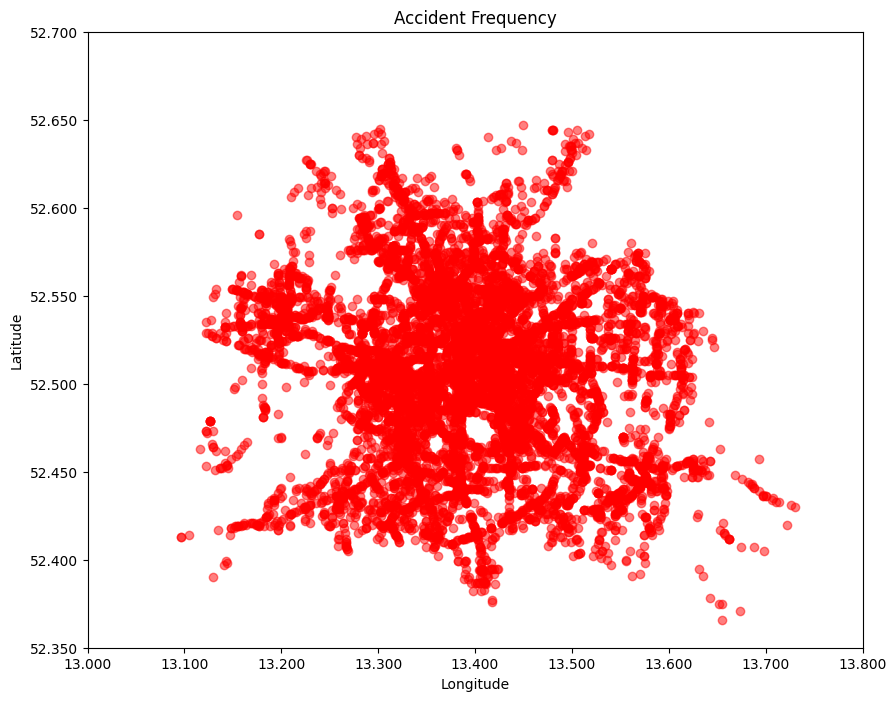

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot of accident frequency
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Frequency')

# Set the number of decimal places for latitude and longitude
decimal_places = 3
plt.xticks(ticks=plt.xticks()[0], labels=[f'{x:.{decimal_places}f}' for x in plt.xticks()[0]])
plt.yticks(ticks=plt.yticks()[0], labels=[f'{y:.{decimal_places}f}' for y in plt.yticks()[0]])

plt.show()

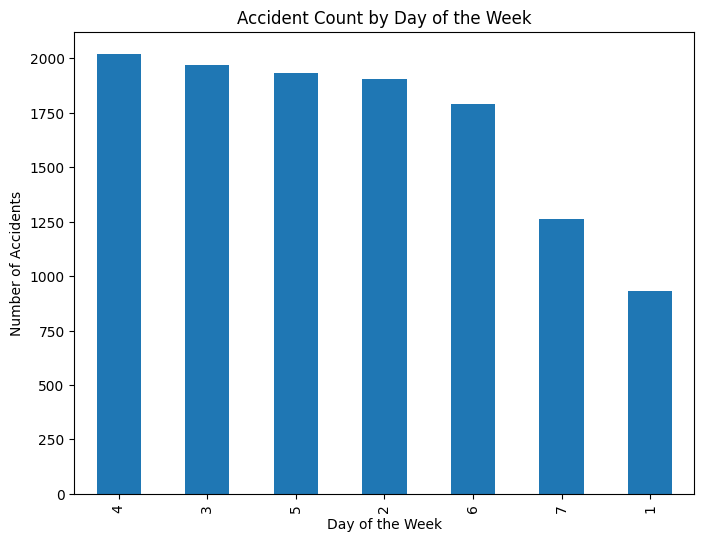

In [12]:
# Bar plot of Accident Count by Day of the Week
plt.figure(figsize=(8, 6))
accident_count_by_day.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Accident Count by Day of the Week')
plt.show()

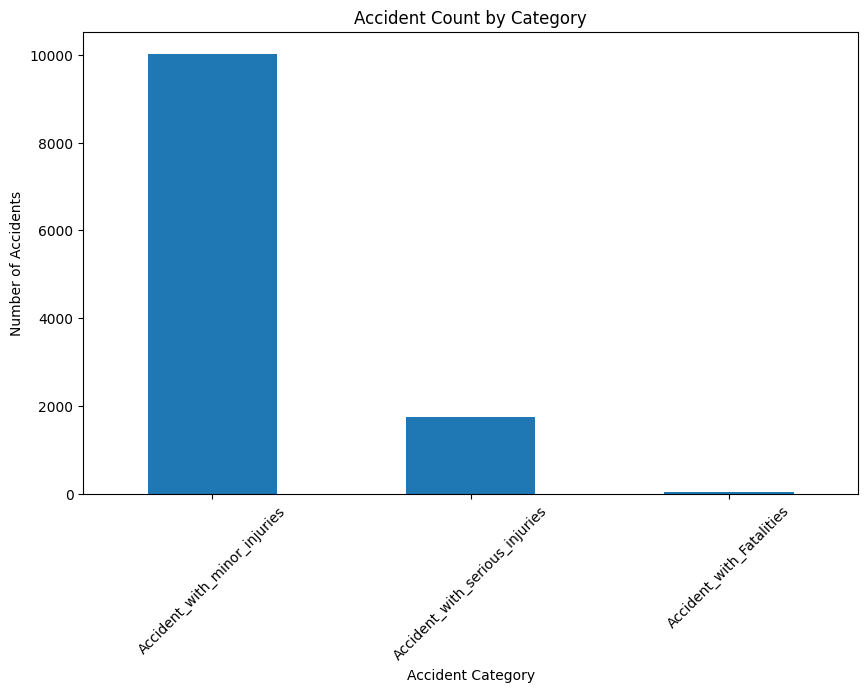

In [13]:
# Bar plot of Accident Count by Category
plt.figure(figsize=(10, 6))
accident_count_by_category.plot(kind='bar')
plt.xlabel('Accident Category')
plt.ylabel('Number of Accidents')
plt.title('Accident Count by Category')
plt.xticks(rotation=45)
plt.show()

In [73]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered around Berlin
map_berlin = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map_berlin)

# Iterate over the dataframe rows
for _, row in df.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    category = row['Categorie_of_the_accident']
    
    # Determine marker color based on accident category
    if category == 'Accident_with_serious_injuries':
        color = 'red'
    elif category == 'Accident_with_minor_injuries':
        color = 'blue'
    elif category == 'Accident_with_Fatalities':
        color = 'green'
    else:
        color = 'gray'
    
    # Create a marker for each accident location
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Category: {category}"
    ).add_to(marker_cluster)

# Display the map
print("Categories:")
print("Accident_with_serious_injuries: Red")
print("Accident_with_minor_injuries: Blue")
print("Accident_with_fatalities: Green")
print()

map_berlin

Categories:
Accident_with_serious_injuries: Red
Accident_with_minor_injuries: Blue
Accident_with_fatalities: Green



In [24]:
import pandas as pd

# Read the table into a Pandas dataframe
df_road_signs = pd.read_sql_table('Location_Traffic_Signs', 'sqlite:///my_database.db')

In [25]:
df_road_signs=df_road_signs[['type', 'longitude','latitude']]

# Round latitude and longitude columns to 4 decimal places
df_road_signs['latitude'] = df_road_signs['latitude'].round(4)
df_road_signs['longitude'] = df_road_signs['longitude'].round(4)

In [26]:
df_road_signs

,type,longitude,latitude
0,Yield,13.4030,52.5378
1,Priority road,13.4024,52.5377
2,No entry,13.4013,52.5374
3,Priority road,13.3189,52.4791
4,Yield,13.3190,52.4808
...,...,...,...
806,Roundabout mandatory,13.4136,52.5279
807,Yield,13.4133,52.5280
808,Yield,13.4124,52.5282
809,Yield,13.4317,52.4951


In [27]:
# df_road_signs

In [28]:
import pandas as pd

# Data Analysis

# Find the pair of latitude and longitude with the highest number of road signs
most_frequent_location = df_road_signs.groupby(['latitude', 'longitude']).size().idxmax()
most_frequent_count = df_road_signs.groupby(['latitude', 'longitude']).size().max()

# Find the road sign that occurs the most
most_common_sign = df_road_signs['type'].value_counts().idxmax()
most_common_sign_count = df_road_signs['type'].value_counts().max()

lowest_location = df_road_signs.groupby(['latitude', 'longitude']).size().idxmin()
lowest_count = df_road_signs.groupby(['latitude', 'longitude']).size().min()

lowest_sign = df_road_signs['type'].value_counts().idxmin()
lowest_sign_count = df_road_signs['type'].value_counts().min()


In [29]:
# Most frequent location and count
print("Most Frequent Location (Latitude, Longitude): ", most_frequent_location)
print("Count of Road Signs at the Most Frequent Location: ", most_frequent_count)
print()

# Location with the lowest number of road signs and count
print("Location with the Lowest Number of Road Signs (Latitude, Longitude): ", lowest_location)
print("Count of Road Signs at the Lowest Location: ", lowest_count)
print()

# Most common road sign and count
print("Most Common Road Sign: ", most_common_sign)
print("Count of Occurrences of the Most Common Road Sign: ", most_common_sign_count)
print()

# Road sign with the lowest occurrence and count
print("Road Sign with the Lowest Occurrence: ", lowest_sign)
print("Count of Occurrences of the Lowest Occurrence Road Sign: ", lowest_sign_count)
print()

Most Frequent Location (Latitude, Longitude):  (52.5007, 13.3768)
Count of Road Signs at the Most Frequent Location:  3

Location with the Lowest Number of Road Signs (Latitude, Longitude):  (52.4684, 13.4309)
Count of Road Signs at the Lowest Location:  1

Most Common Road Sign:  Yield
Count of Occurrences of the Most Common Road Sign:  366

Road Sign with the Lowest Occurrence:  Bumpy road
Count of Occurrences of the Lowest Occurrence Road Sign:  1



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


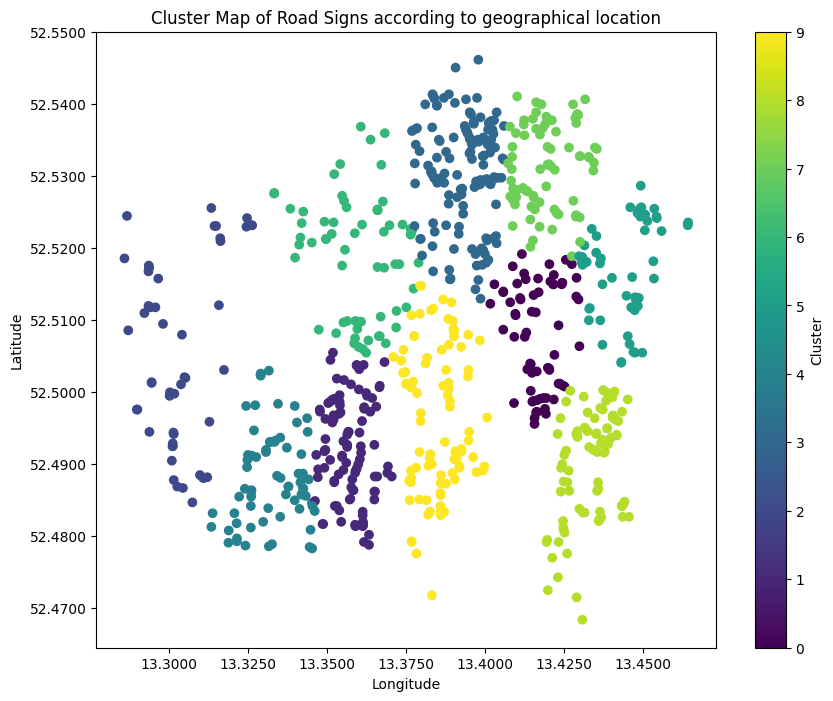

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from sklearn.cluster import KMeans

# Perform clustering on the geographical coordinates
coordinates = df_road_signs[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=10)  # Specify the number of clusters
labels = kmeans.fit_predict(coordinates)

# Plot the cluster map
plt.figure(figsize=(10, 8))
plt.scatter(df_road_signs['longitude'], df_road_signs['latitude'], c=labels, cmap='viridis')

# Format latitude and longitude axes
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cluster Map of Road Signs according to geographical location')
plt.colorbar(label='Cluster')
plt.show()

In [31]:
# !pip install geopandas

/tmp/ipykernel_921/1360762262.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


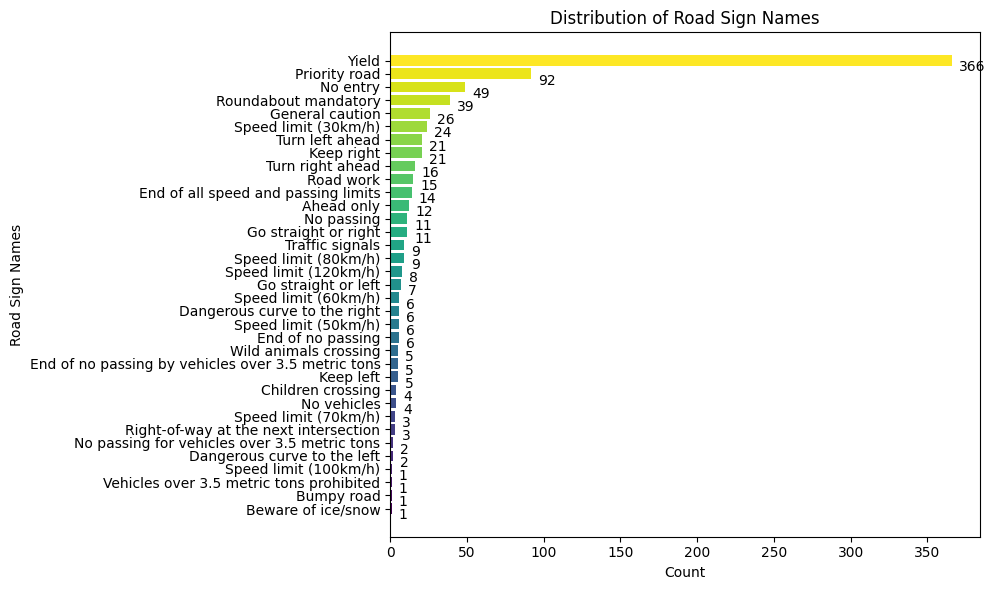

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the road sign names by count in descending order
sorted_counts = df_road_signs['type'].value_counts().sort_values(ascending=True)

# Create a horizontal bar chart with hovering functionality
fig, ax = plt.subplots(figsize=(10, 6))

# Define the colormap
cmap = plt.cm.get_cmap('viridis')
colors = np.linspace(0, 1, len(sorted_counts))

# Create the horizontal bar plot with gradient colors
barh_plot = ax.barh(sorted_counts.index, sorted_counts.values, color=cmap(colors))

# Add values as annotations on the bars
for rect in barh_plot:
    width = rect.get_width()
    ax.annotate(f'{width}', xy=(width, rect.get_y() + rect.get_height() / 2),
                xytext=(5, -5), textcoords='offset points', ha='left', va='center')

# Customize the appearance of the chart
ax.set_xlabel('Count')
ax.set_ylabel('Road Sign Names')
ax.set_title('Distribution of Road Sign Names')
plt.tight_layout()

plt.show()

/tmp/ipykernel_921/1656794828.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab20', len(types))
/tmp/ipykernel_921/1656794828.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_subset['longitude'], df_subset['latitude'], alpha=0.5, c=color, label=label)


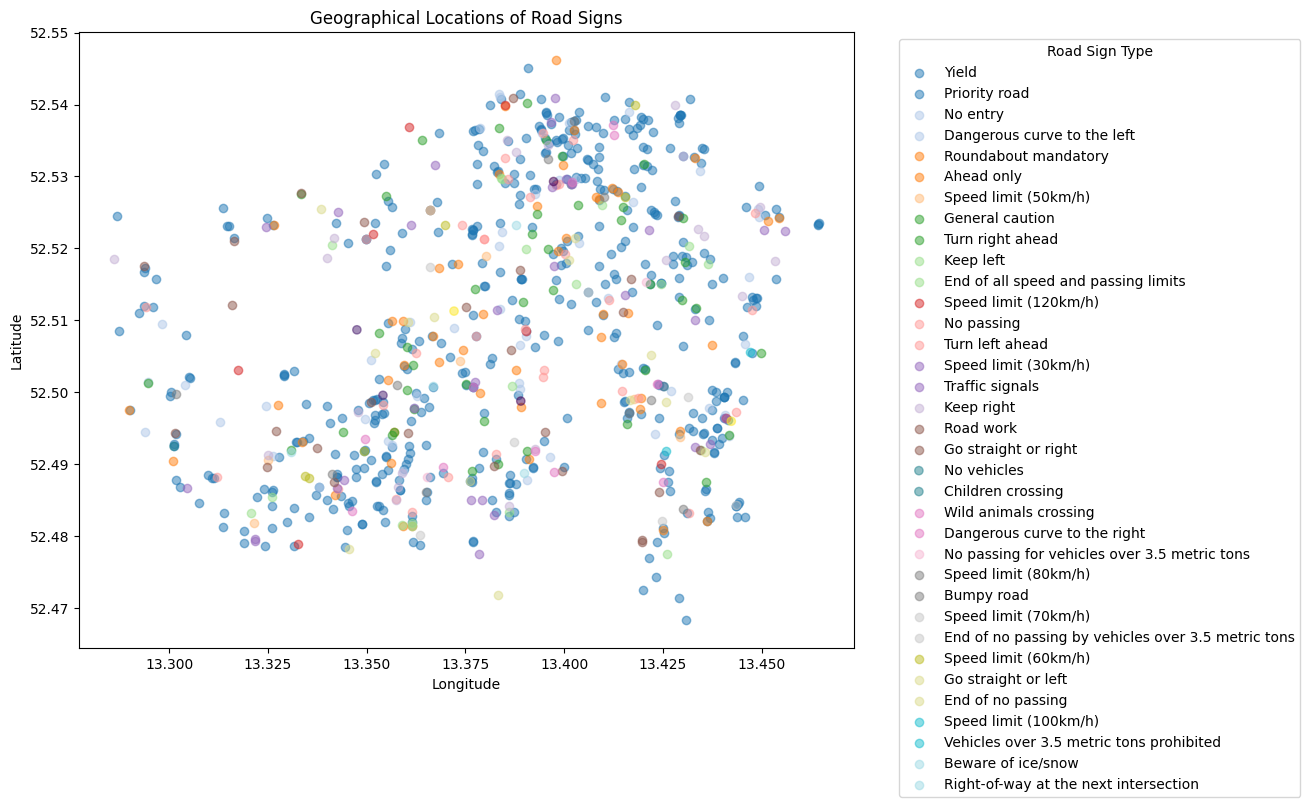

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot to visualize the geographical locations of road signs
plt.figure(figsize=(10, 8))

# Get unique road sign types
types = df_road_signs['type'].unique()

# Define a color map with the number of unique road sign types
colormap = plt.cm.get_cmap('tab20', len(types))

# Generate an array of color indices based on the unique road sign types
color_indices = np.arange(len(types))

# Create a dictionary to map each road sign type to a color
type_colors = {types[i]: colormap(color_indices[i]) for i in range(len(types))}

# Scatter plot with different colors for each road sign type
for label, color in type_colors.items():
    df_subset = df_road_signs[df_road_signs['type'] == label]
    plt.scatter(df_subset['longitude'], df_subset['latitude'], alpha=0.5, c=color, label=label)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Locations of Road Signs')

# Position the legend outside the scatter plot
plt.legend(title='Road Sign Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [43]:
# !pip install 

In [44]:
# import folium
# from folium.plugins import MarkerCluster

# # Create a map centered around Berlin
# map_berlin = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# # Create a MarkerCluster object
# marker_cluster = MarkerCluster().add_to(map_berlin)

# # Iterate over the dataframe rows
# for _, row in df_road_signs.iterrows():
#     lat = row['latitude']
#     lon = row['longitude']
#     category = row['type']
    
#     # Create a marker for each road sign location
#     folium.CircleMarker(
#         location=[lat, lon],
#         radius=5,
#         color='blue',
#         fill=True,
#         fill_color='blue',
#         fill_opacity=0.7,
#         popup=f"Road Sign: {category}"
#     ).add_to(marker_cluster)

# # Display the map
# map_berlin

In [45]:
# !pip install plotly

In [46]:
import folium
import random
from folium.plugins import MarkerCluster

# Create a map centered around Berlin
map_berlin = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Create a MarkerCluster object
marker_cluster = MarkerCluster().add_to(map_berlin)

# Get unique road sign types
unique_types = df_road_signs['type'].unique()

# Generate random colors for each road sign type
random.shuffle(unique_types)
colors = random.sample(range(256), len(unique_types))

# Create a color mapping dictionary for road sign types
color_mapping = {unique_types[i]: '#%02x%02x%02x' % (colors[i], colors[i], colors[i]) for i in range(len(unique_types))}

# Iterate over the dataframe rows
for _, row in df_road_signs.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    category = row['type']
    
    # Get the color based on the road sign type
    color = color_mapping.get(category, 'blue')  # Default color is blue if type is not in the mapping
    
    # Create a marker for each road sign location with the corresponding color
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Road Sign: {category}"
    ).add_to(marker_cluster)

# Display the map
map_berlin

In [47]:
# !pip install scikit-learn

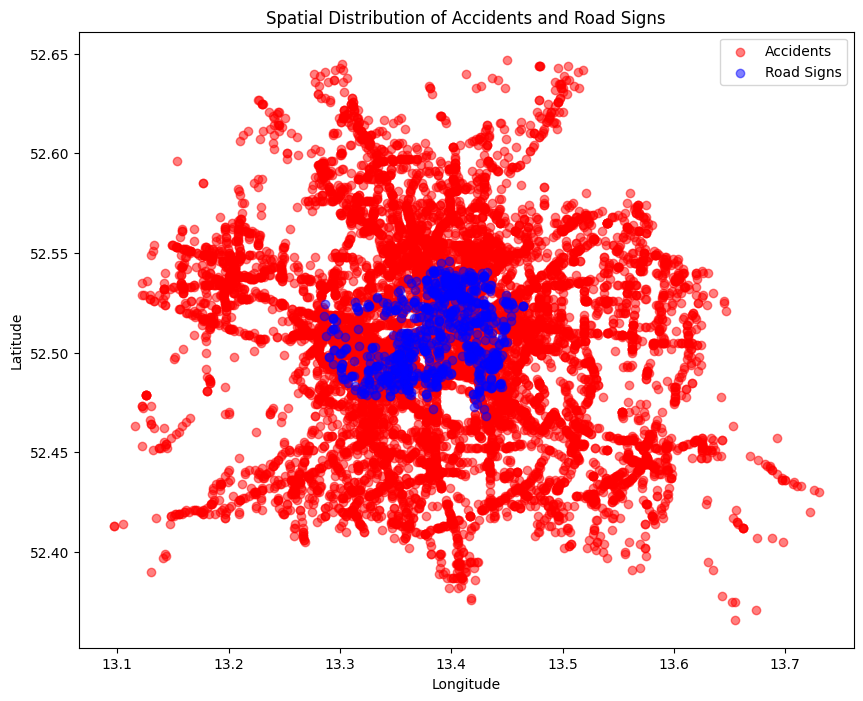

In [48]:
# Spatial visualization using scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='red', label='Accidents')
plt.scatter(df_road_signs['longitude'], df_road_signs['latitude'], alpha=0.5, c='blue', label='Road Signs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Accidents and Road Signs')
plt.legend()
plt.show()

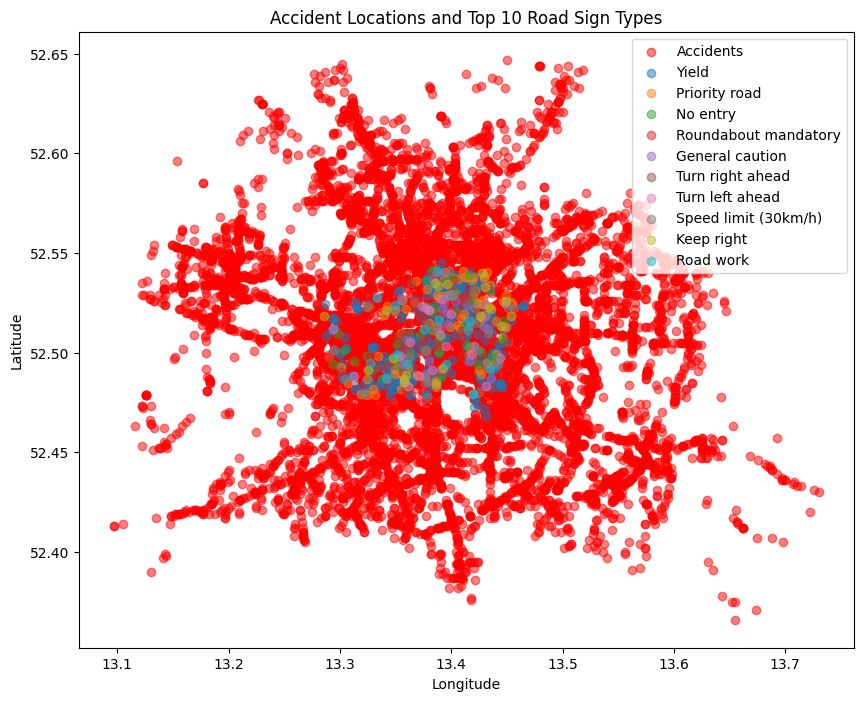

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Count the frequency of road sign types
road_sign_counts = df_road_signs['type'].value_counts().head(10)

# Filter the road sign dataframe for the top 10 frequent types
top_10_road_signs = df_road_signs[df_road_signs['type'].isin(road_sign_counts.index)]

# Set up the scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot of accident locations
plt.scatter(df['Longitude'], df['Latitude'], color='red', alpha=0.5, label='Accidents')

# Scatter plot of road sign locations with different colors for each type
for sign_type, color in zip(top_10_road_signs['type'].unique(), plt.cm.tab10.colors):
    sign_data = top_10_road_signs[top_10_road_signs['type'] == sign_type]
    plt.scatter(sign_data['longitude'], sign_data['latitude'], color=color, alpha=0.5, label=sign_type)

# Set plot labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Locations and Top 10 Road Sign Types')

# Show the legend
plt.legend()

# Display the plot
plt.show()

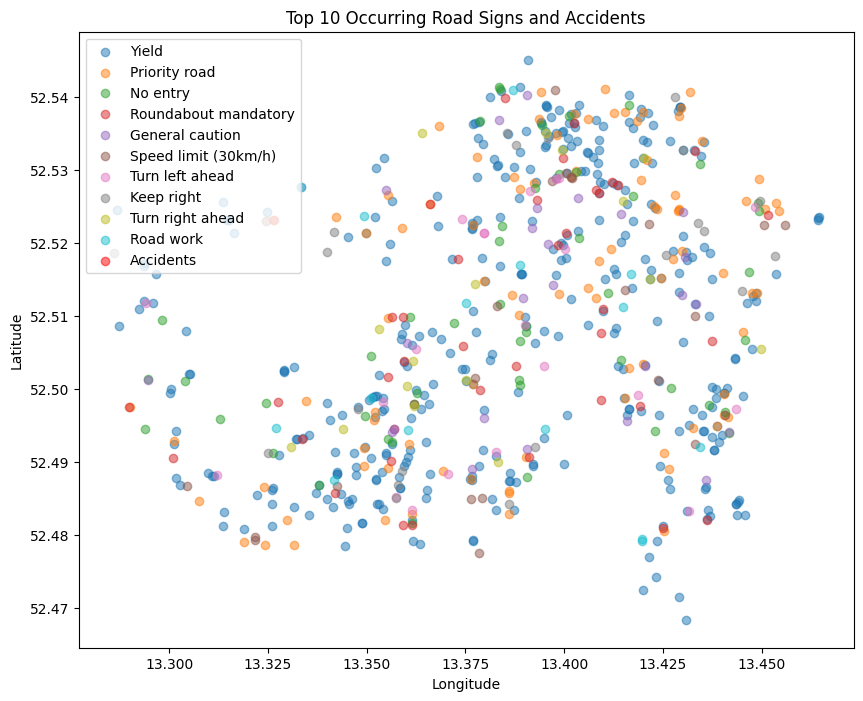

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Count the frequency of road sign types
road_sign_counts = df_road_signs['type'].value_counts().head(10)

# Filter the accident dataframe for the road sign types in top 10
filtered_accidents = df[df['Categorie_of_the_accident'].isin(road_sign_counts.index)]

# Set up the scatter plot
plt.figure(figsize=(10, 8))

# Scatter plot of road sign locations with different colors for each type
for sign_type, color in zip(road_sign_counts.index, plt.cm.tab10.colors):
    sign_data = df_road_signs[df_road_signs['type'] == sign_type]
    plt.scatter(sign_data['longitude'], sign_data['latitude'], color=color, alpha=0.5, label=sign_type)

# Scatter plot of accident locations
plt.scatter(filtered_accidents['Longitude'], filtered_accidents['Latitude'], color='red', alpha=0.5, label='Accidents')

# Set plot labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 10 Occurring Road Signs and Accidents')

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [51]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Data Preparation
# # Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# # Count the frequency of road sign types
# road_sign_counts = df_road_signs['type'].value_counts().head(10)

# # Filter the accident dataframe for the road sign types in top 10
# filtered_accidents = df[df['Categorie_of_the_accident'].isin(road_sign_counts.index)]

# # Set up the scatter plot
# plt.figure(figsize=(10, 8))

# # Scatter plot of road sign locations with different colors for each type
# for sign_type, color in zip(road_sign_counts.index, plt.cm.tab10.colors):
#     sign_data = df_road_signs[df_road_signs['type'] == sign_type]
#     plt.scatter(sign_data['longitude'], sign_data['latitude'], color=color, alpha=0.5, label=sign_type)

# # Scatter plot of accident locations
# plt.scatter(filtered_accidents['Longitude'], filtered_accidents['Latitude'], color='red', alpha=0.8, s=50, label='Accidents')

# # Set plot labels and title
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('Top 10 Occurring Road Signs and Accidents')

# # Show the legend
# plt.legend()

# # Display the plot
# plt.show()

In [52]:
import pandas as pd

# Outliers removed
# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Round latitude and longitude to 3 decimal places
df['Latitude'] = df['Latitude'].round(3)
df['Longitude'] = df['Longitude'].round(3)
df_road_signs['latitude'] = df_road_signs['latitude']
df_road_signs['longitude'] = df_road_signs['longitude']

# Merge the two dataframes based on matching latitude and longitude
merged_data = pd.merge(df_road_signs, df, left_on=['latitude', 'longitude'], right_on=['Latitude', 'Longitude'], how='left')

# Group by road sign type and calculate count of accidents
accidents_by_sign = merged_data.groupby('type').size().reset_index(name='Accident Count')

# Sort the table by Accident Count in descending order
accidents_by_sign = accidents_by_sign.sort_values('Accident Count', ascending=False)

# Remove rows with specific types ('Yield' and 'Priority Road')
types_to_remove = ['Yield', 'Priority road']
accidents_by_sign = accidents_by_sign[~accidents_by_sign['type'].isin(types_to_remove)]

# Print the table
print(accidents_by_sign)


                                                 type  Accident Count
14                                           No entry              56
21                               Roundabout mandatory              39
9                                     General caution              26
24                               Speed limit (30km/h)              24
30                                    Turn left ahead              21
13                                         Keep right              21
0                                          Ahead only              21
31                                   Turn right ahead              16
20                                          Road work              15
6                 End of all speed and passing limits              14
11                               Go straight or right              11
15                                         No passing              11
29                                    Traffic signals               9
28                  

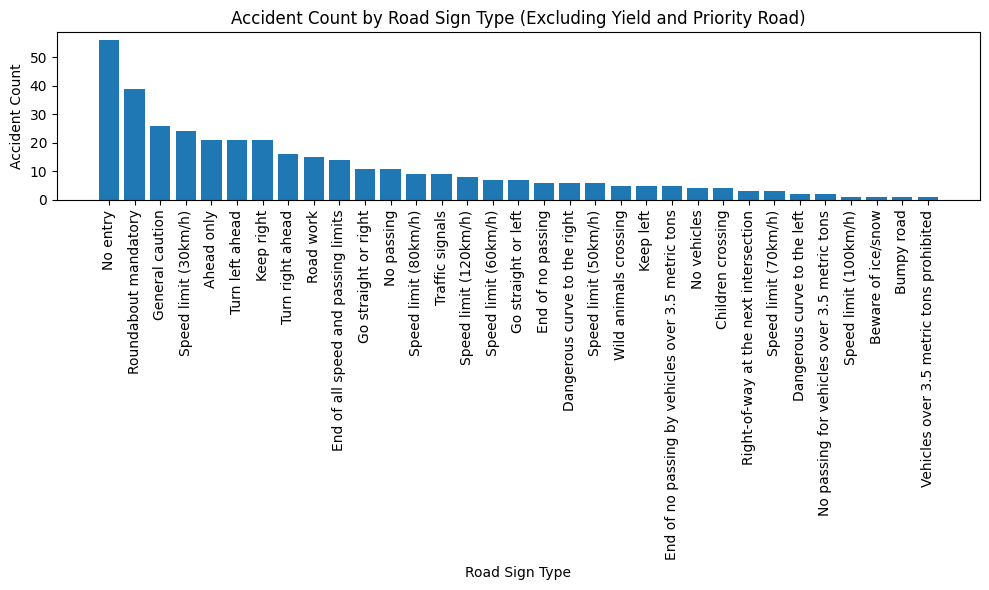

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Preparation
# Assuming you have loaded and formatted the two datasets as dataframes: df and df_road_signs

# Round latitude and longitude to 3 decimal places
df['Latitude'] = df['Latitude'].round(3)
df['Longitude'] = df['Longitude'].round(3)
df_road_signs['latitude'] = df_road_signs['latitude']
df_road_signs['longitude'] = df_road_signs['longitude']

# Merge the two dataframes based on matching latitude and longitude
merged_data = pd.merge(df_road_signs, df, left_on=['latitude', 'longitude'], right_on=['Latitude', 'Longitude'], how='left')

# Group by road sign type and calculate count of accidents
accidents_by_sign = merged_data.groupby('type').size().reset_index(name='Accident Count')

# Remove rows with specific types ('Yield' and 'Priority Road')
types_to_remove = ['Yield', 'Priority road']
accidents_by_sign = accidents_by_sign[~accidents_by_sign['type'].isin(types_to_remove)]

# Sort the dataframe by accident count in descending order
accidents_by_sign = accidents_by_sign.sort_values(by='Accident Count', ascending=False)

# Data Visualization - Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(accidents_by_sign['type'], accidents_by_sign['Accident Count'])
plt.xlabel('Road Sign Type')
plt.ylabel('Accident Count')
plt.title('Accident Count by Road Sign Type (Excluding Yield and Priority Road)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
